In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.ticker as mticker

from matplotlib.dates import DateFormatter
from datetime import timedelta

billboard_hot_100 = pd.read_csv("../billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")
billboard_hot_100["top_position"] = billboard_hot_100.groupby(["artist", "song_name"])["position"].transform("min")

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3412998217.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],


In [4]:
# MTV Launch date
mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)

# Spotify creation date
spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)

# Youtube creation date
youtube_creation_date = pd.to_datetime("2005-02-14", infer_datetime_format=True)

# Apple music creation date
apple_music_creation_date = pd.to_datetime("2015-06-30", infer_datetime_format=True)

# CDs creation date
cds_creation_date = pd.to_datetime("1982-08-17", infer_datetime_format=True)

# MP3 creation date
mp3_creation_date = pd.to_datetime("1991-12-01", infer_datetime_format=True)

# iTunes release date
itunes_creation_date = pd.to_datetime("2001-01-09", infer_datetime_format=True)

# Cassettes creation date
cassettes_creation_date = pd.to_datetime("1963-08-30", infer_datetime_format=True)

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\1792693761.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)
C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\1792693761.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)
C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\1792693761.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict

In [5]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
def get_past_weeks(row):
    top_position = row["top_position"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    past_weeks = row[
        (row["first_day_of_the_week"] <= top_position_time)]["weeks_on_chart"].max()
    return past_weeks

df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_past_weeks(row)).rename("past_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_past_weeks[["artist", "song_name", "past_weeks"]], on=["artist", "song_name"], how="left")

def get_future_weeks(row):
    top_position = row["top_position"].iloc[0]
    past_weeks = row["past_weeks"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    max_weeks = row[
        (row["first_day_of_the_week"] > top_position_time)]["weeks_on_chart"].max()
    if max_weeks is np.nan or max_weeks == 0:
        return 0
    future_weeks = max_weeks - past_weeks
    if future_weeks is np.nan or future_weeks < 0:
        return 0
    return future_weeks

df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_future_weeks(row)).rename("future_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_future_weeks[["artist", "song_name", "future_weeks"]], on=["artist", "song_name"], how="left")

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3322084532.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3322084532.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(


In [7]:
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")

billboard_hot_100["first_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("first")["position"]
billboard_hot_100["last_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("last")["position"]

billboard_hot_100_copy = billboard_hot_100.copy()
billboard_hot_100_ml = billboard_hot_100.groupby(
    ["artist", "song_name"])[["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "year", "first_position", "last_position"]].first().reset_index()

In [8]:
# based on year assign decade
def assign_decade(row):
    year = row["year"].iloc[0]
    if year < 1950:
        return "1940s"
    elif year < 1960:
        return "1950s"
    elif year < 1970:
        return "1960s"
    elif year < 1980:
        return "1970s"
    elif year < 1990:
        return "1980s"
    elif year < 2000:
        return "1990s"
    elif year < 2010:
        return "2000s"
    elif year < 2020:
        return "2010s"
    else:
        return "2020s"

billboard_hot_100_ml["decade"] = billboard_hot_100_ml.groupby(["artist", "song_name"]).apply(
    lambda row: assign_decade(row)).values

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\2577376328.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  billboard_hot_100_ml["decade"] = billboard_hot_100_ml.groupby(["artist", "song_name"]).apply(


# Decade

In [9]:
from tqdm import tqdm
from datetime import datetime, timedelta
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from pandas.plotting import table

In [10]:
features = ["past_weeks", "top_position", "future_weeks", "first_position", "last_position"]

In [11]:
# write some basic ML model to predict cluster/archetype based on the features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = billboard_hot_100_ml[features]
y = billboard_hot_100_ml["decade"]

# normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# balance
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto')
X, y = oversampler.fit_resample(X, y) 

# crossvalidation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators=100, random_state=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=5)  # X: features, y: target, 5-fold cross-validation

Accuracy: 0.774
Precision: 0.774
Recall: 0.774
F1-score: 0.769


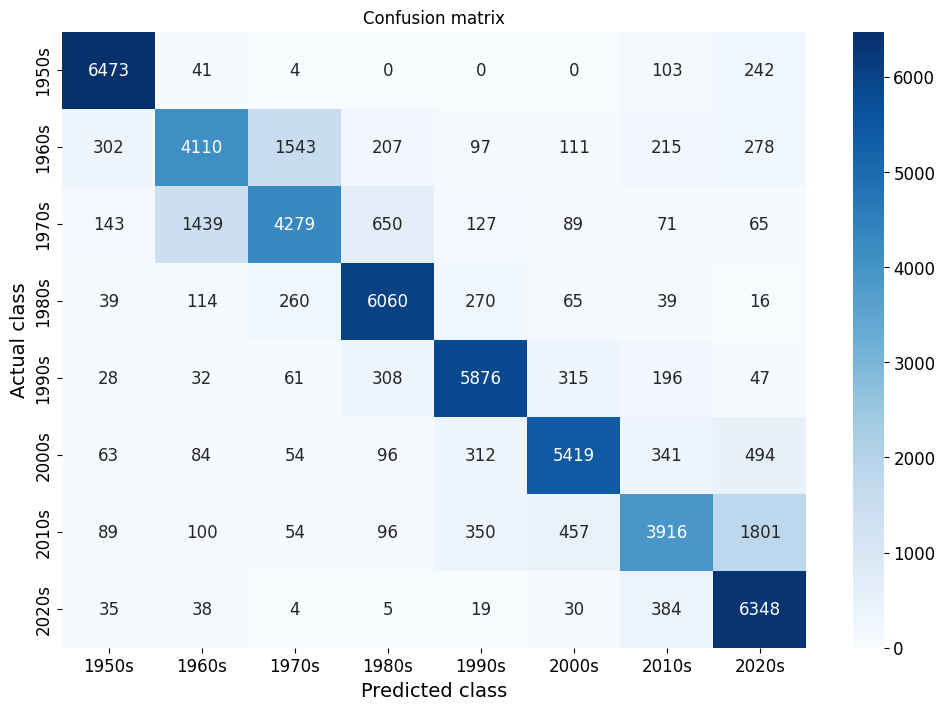

In [12]:
# Calculate Precision, Recall, and F1-score
precision = precision_score(y, y_pred, average='macro')  # average='macro' for multi-class problems
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

print(f"Accuracy: {accuracy_score(y, y_pred):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion matrix')
plt.savefig("appendix/ML_decade.jpg", format="jpg", dpi=300)
plt.show()

# Lifetime

In [13]:
billboard_hot_100 = pd.read_csv("../billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")
billboard_hot_100["top_position"] = billboard_hot_100.groupby(["artist", "song_name"])["position"].transform("min")

def get_past_weeks(row):
    top_position = row["top_position"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    past_weeks = row[
        (row["first_day_of_the_week"] <= top_position_time)]["weeks_on_chart"].max()
    return past_weeks

df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_past_weeks(row)).rename("past_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_past_weeks[["artist", "song_name", "past_weeks"]], on=["artist", "song_name"], how="left")

def get_future_weeks(row):
    top_position = row["top_position"].iloc[0]
    past_weeks = row["past_weeks"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    max_weeks = row[
        (row["first_day_of_the_week"] > top_position_time)]["weeks_on_chart"].max()
    if max_weeks is np.nan or max_weeks == 0:
        return 0
    future_weeks = max_weeks - past_weeks
    if future_weeks is np.nan or future_weeks < 0:
        return 0
    return future_weeks

df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_future_weeks(row)).rename("future_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_future_weeks[["artist", "song_name", "future_weeks"]], on=["artist", "song_name"], how="left")

billboard_hot_100["first_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("first")["position"]
billboard_hot_100["last_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("last")["position"]

billboard_hot_100_copy = billboard_hot_100.copy()

billboard_hot_100_5_ml = billboard_hot_100_copy.groupby(
    ["artist", "song_name"])[["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "year", "first_position", "last_position"]].first().reset_index()

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3381900945.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3381900945.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3381900945.py:37: DeprecationWa

In [14]:
def assign_max_weeks_on_chart(row):
    max_weeks_on_chart = row["max_weeks_on_chart"].iloc[0]
    if max_weeks_on_chart <= 5:
        return "1-5"
    elif max_weeks_on_chart <= 10:
        return "6-10"
    elif max_weeks_on_chart <= 15:
        return "11-15"
    elif max_weeks_on_chart <= 20:
        return "16-20"
    elif max_weeks_on_chart <= 25:
        return "21-25"
    elif max_weeks_on_chart <= 30:
        return "26-30"
    elif max_weeks_on_chart <= 35:
        return "31-35"
    elif max_weeks_on_chart <= 40:
        return "36-40"
    elif max_weeks_on_chart <= 45:
        return "41-45"
    elif max_weeks_on_chart <= 50:
        return "46-50"
    else:
        return "50+"

billboard_hot_100_5_ml["max_weeks_on_chart_2"] = billboard_hot_100_5_ml.groupby(["artist", "song_name"]).apply(
    lambda row: assign_max_weeks_on_chart(row)).values
true_labels_2 = billboard_hot_100_5_ml["max_weeks_on_chart_2"].unique()

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\2048280790.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  billboard_hot_100_5_ml["max_weeks_on_chart_2"] = billboard_hot_100_5_ml.groupby(["artist", "song_name"]).apply(


In [15]:
# max max_weeks_on_chart to groups 5-10, 10-15 etc.

def assign_max_weeks_on_chart(row):
    max_weeks_on_chart = row["max_weeks_on_chart"].iloc[0]
    if max_weeks_on_chart < 10:
        return "1-9"
    elif max_weeks_on_chart < 20:
        return "10-19"
    elif max_weeks_on_chart < 30:
        return "20-29"
    elif max_weeks_on_chart < 40:
        return "30-39"
    elif max_weeks_on_chart < 50:
        return "40-49"
    else:
        return "50+"

true_labels = ["1-9", "10-19", "20-29", "30-39", "40-49", "50+"]

billboard_hot_100_5_ml["max_weeks_on_chart"] = billboard_hot_100_5_ml.groupby(["artist", "song_name"]).apply(
    lambda row: assign_max_weeks_on_chart(row)).values

C:\Users\cutie\AppData\Local\Temp\ipykernel_15516\3564160784.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  billboard_hot_100_5_ml["max_weeks_on_chart"] = billboard_hot_100_5_ml.groupby(["artist", "song_name"]).apply(


In [16]:
features = ["year", "first_position"]

In [17]:
# write some basic ML model to predict lifetime based on the features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = billboard_hot_100_5_ml[features]
# map max_weeks_on_chart to numbers

mapping = {label: i for i, label in enumerate(true_labels)}

y = billboard_hot_100_5_ml["max_weeks_on_chart"].map(mapping)

# normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# balance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampler = SMOTE(sampling_strategy='auto')
X, y = oversampler.fit_resample(X, y) 

# crossvalidation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators=100, random_state=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=5)  # X: features, y: target, 5-fold cross-validation

Accuracy: 0.690
Precision: 0.689
Recall: 0.690
F1-score: 0.689


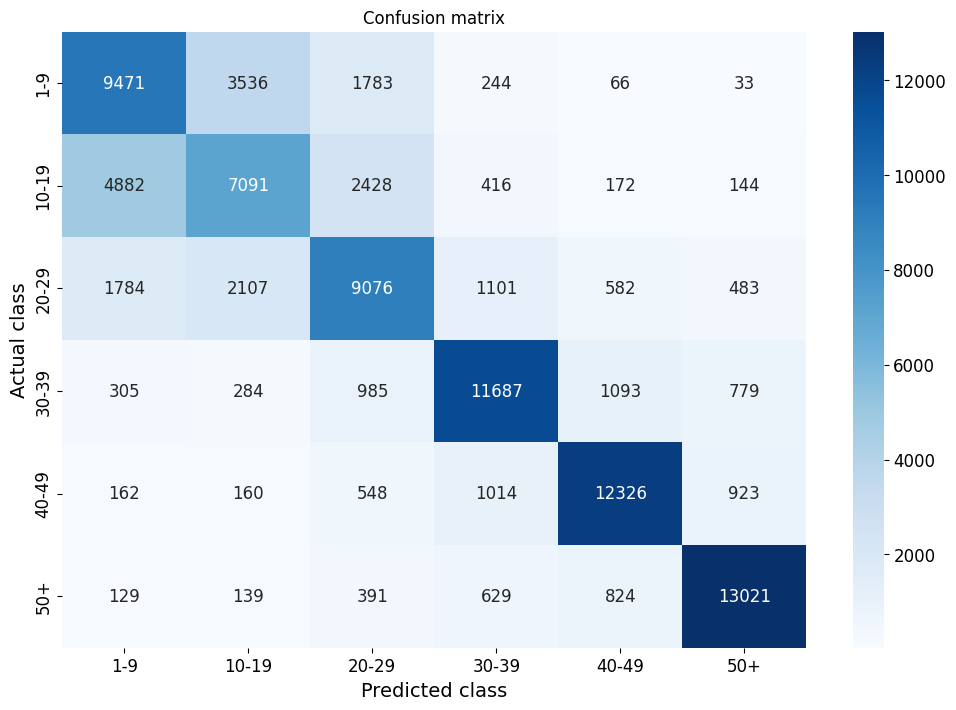

In [18]:
# Calculate Precision, Recall, and F1-score
precision = precision_score(y, y_pred, average='macro')  # average='macro' for multi-class problems
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

print(f"Accuracy: {accuracy_score(y, y_pred):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion matrix')
ax = plt.gca()
ax.set_xticklabels(true_labels)
ax.set_yticklabels(true_labels)
plt.savefig("appendix/ML_lifetime.jpg", format="jpg", dpi=300)
plt.show()

In [19]:
model.fit(X, y)

RandomForestClassifier(random_state=1)

In [20]:
def reverse_mapping(mapping):
    return {v: k for k, v in mapping.items()}

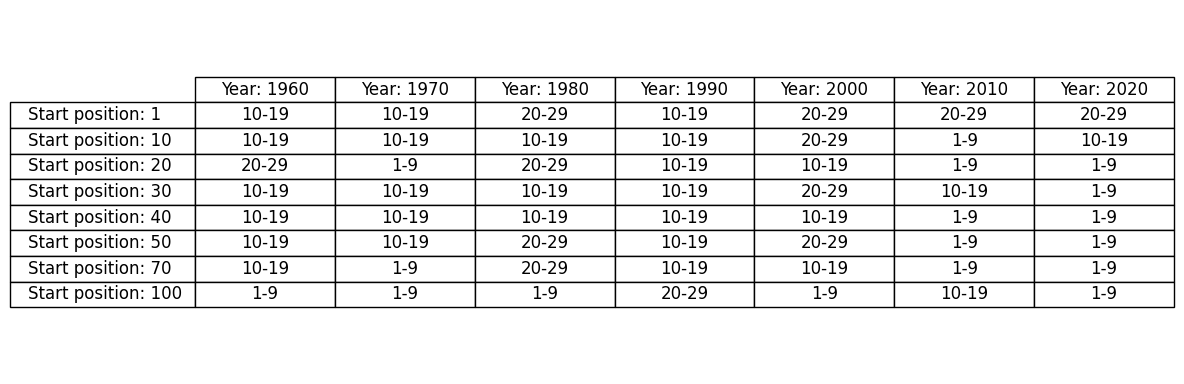

In [21]:
all_start_positions = billboard_hot_100_5_ml["first_position"].unique()
all_start_positions.sort()
all_years = billboard_hot_100_5_ml["year"].unique()
all_years.sort()
predicted_lifetimes = {}
selected_start_positions = [1, 10, 20, 30, 40, 50, 70, 100]
selected_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
for start_position in selected_start_positions:
    for year in selected_years:
        X_test = pd.DataFrame({"year": [year], "first_position": [start_position]})
        X_test = scaler.transform(X_test)
        y_pred = model.predict(X_test)
        predicted_lifetimes[(start_position, year)] = reverse_mapping(mapping)[y_pred[0]]

# plot predicted lifetimes
plt.figure(figsize=(12, 4))
# Create the table
tab = plt.table(cellText=[[predicted_lifetimes[(start_position, year)] for year in selected_years] for start_position in selected_start_positions],
            rowLabels=[f"Start position: {start_position}" for start_position in selected_start_positions],
            colLabels=[f"Year: {year}" for year in selected_years],
            loc='center', colLoc='center', cellLoc='center')

tab.scale(1, 1.3)

# Generate LaTeX code for the table
latex_code = "\\begin{tabular}{l" + "c" * len(selected_years) + "}\n\\toprule\n"
latex_code += "Entry Position & " + " & ".join([f"Year: {year}" for year in selected_years]) + " \\\\\n"
latex_code += "\\midrule\n"

for start_position in selected_start_positions:
    row = [f"Position: {start_position}"]
    for year in selected_years:
        row.append(predicted_lifetimes[(start_position, year)])
    latex_code += " & ".join(map(str, row)) + " \\\\\n"

latex_code += "\\bottomrule\n\\end{tabular}"

# Save LaTeX code to file
with open("predicted_lifetimes.txt", "w") as f:
    f.write(latex_code)
plt.axis("off")
plt.tight_layout()
plt.savefig("appendix/predicted_lifetimes.jpg", format="jpg", dpi=300)
plt.show()

# For 5

In [18]:
# write some basic ML model to predict lifetime based on the features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = billboard_hot_100_5_ml[features]
# map max_weeks_on_chart to numbers

mapping = {label: i for i, label in enumerate(true_labels_2)}

y = billboard_hot_100_5_ml["max_weeks_on_chart_2"].map(mapping)

# normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# balance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampler = SMOTE(sampling_strategy='auto')
X, y = oversampler.fit_resample(X, y) 

# crossvalidation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators=100, random_state=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=5)  # X: features, y: target, 5-fold cross-validation

Accuracy: 0.571
Precision: 0.569
Recall: 0.571
F1-score: 0.569


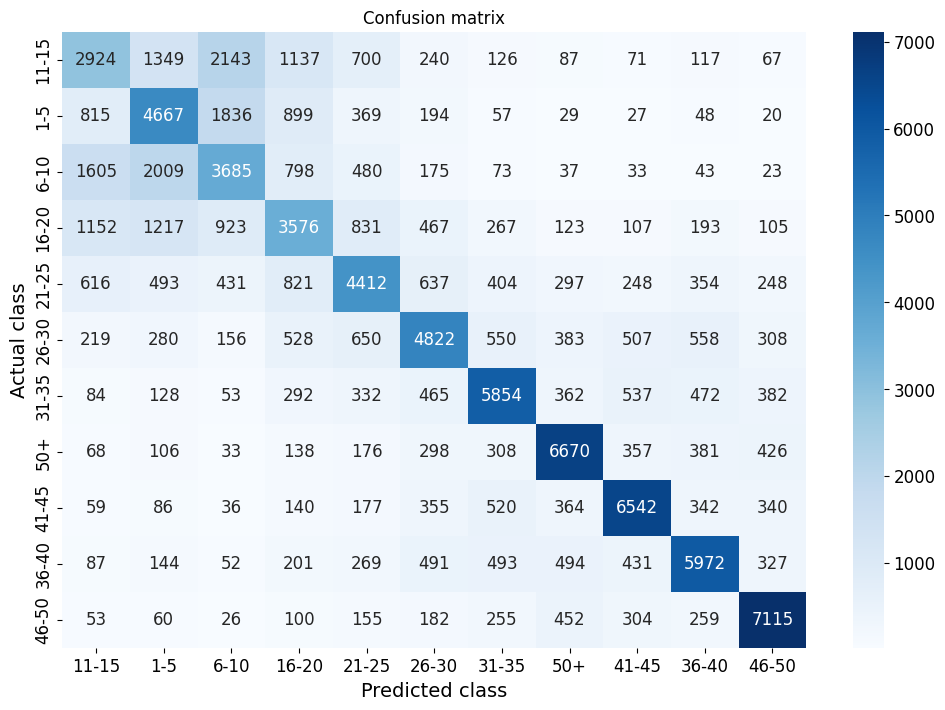

In [21]:
# Calculate Precision, Recall, and F1-score
precision = precision_score(y, y_pred, average='macro')  # average='macro' for multi-class problems
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

print(f"Accuracy: {accuracy_score(y, y_pred):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion matrix')
ax = plt.gca()
ax.set_xticklabels(true_labels_2)
ax.set_yticklabels(true_labels_2)
plt.savefig("appendix/ML_lifetime_5.jpg", format="jpg", dpi=300)
plt.show()